In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('DailyDelhiClimateTest.csv', usecols=['date', 'meantemp'])

In [20]:
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      114 non-null    object 
 1   meantemp  114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [23]:
df['date'] = pd.to_datetime(df['date'])

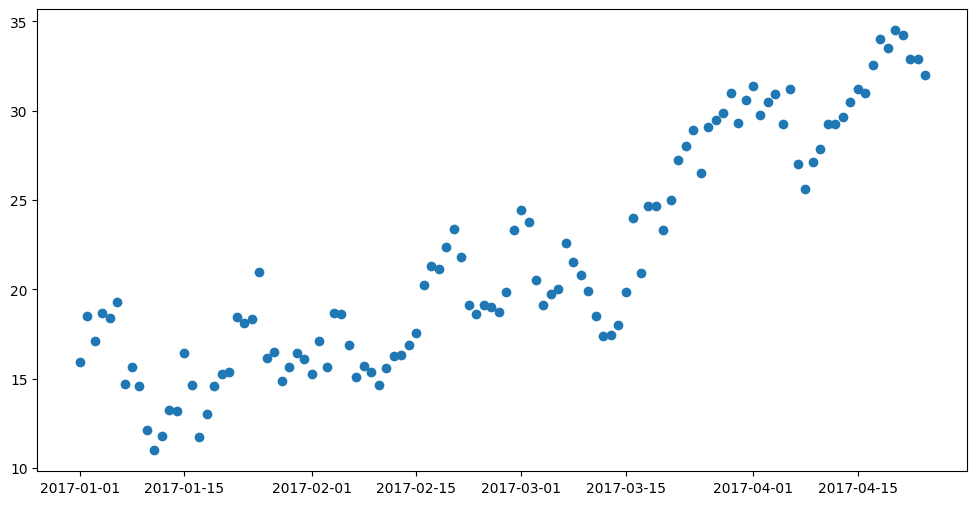

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['meantemp'], label='Daily Mean Temperature')

### Here Exponentially weighted moving avg.

In [36]:
x1 = df['meantemp'].ewm(alpha=0.1).mean()             ### use 0.1, 0.9, 0.5, etc.

In [32]:
x1

0      15.913043
1      17.274600
2      17.214272
3      17.646295
4      17.827632
         ...    
109    30.640166
110    31.001152
111    31.191039
112    31.359436
113    31.423493
Name: meantemp, Length: 114, dtype: float64

In [33]:
df['ewma'] = x1

In [34]:
df

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,17.274600
2,2017-01-03,17.111111,17.214272
3,2017-01-04,18.700000,17.646295
4,2017-01-05,18.388889,17.827632
...,...,...,...
109,2017-04-20,34.500000,30.640166
110,2017-04-21,34.250000,31.001152
111,2017-04-22,32.900000,31.191039
112,2017-04-23,32.875000,31.359436


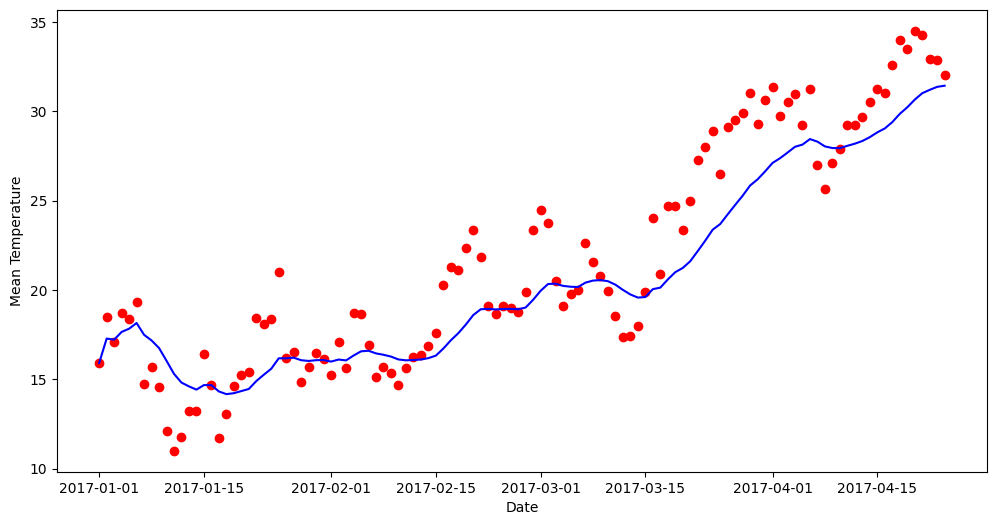

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['meantemp'], color='red', label='Daily Mean Temperature')
plt.plot(df['date'], df['ewma'], color='blue', label='EWMA (alpha=0.9)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()